# Лабораторная работа №7.
# ЧИСЛЕННОЕ РЕШЕНИЕ ЗАДАЧИ КОШИ  ДЛЯ СИСТЕМ ОДУ
# Вариант 27

Работа студента группы А-13а-19

Башлыкова Матвея

**Задача 7.1. Дана задача Коши для системы двух обыкновенных дифференциальных уравнений.**

$$
\begin{cases} u' = f_0(t, u, v) = u + v^2 + t\\v' = f_1(t, u, v) = \sqrt{uv}\\u(0) = 1, v(0) = 1 \end{cases}
$$
                             
**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**

**1.** Модифицировать программу решения задачи по явному методу Эйлера из лабораторной работы 6
для решения системы дифференциальных уравнений.
Найти приближенное решение задачи Коши с шагом h = 0.01. на отрезке [0,1].
Оценить величину погрешности по правилу Рунге.

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Отрезок и шаг:
a_1 = 0
b_1 = 1
h_1 = 0.01

# Функция u' = f_0(t, u, v)
def f_0(t, u, v):
    return u + v * v + t

# Функция v' = f_1(t, u, v)
def f_1(t, u, v):
    return math.sqrt(u * v)

# Метод Эйлера для нахождения приближённого решения для конкретного разбиения
# x_0 - точка t из начального условия
# Y_0 - вектор Y(x_0)
# h - шаг
# number_of_points - разбиение
# fun_0 - производная u' первой компоненты Y
# fun_1 - производная v' второй компоненты Y
def euler(x_0, Y_0, h, number_of_points, fun_0, fun_1):
    res = [[Y_0[0]], [Y_0[1]]]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        res[0].append(res[0][i] + h * fun_0(points[i], res[0][i], res[1][i]))
        res[1].append(res[1][i] + h * fun_1(points[i], res[0][i], res[1][i]))
    return np.array(res), np.array(points)

# Правило Рунге
def runge_rule(y_h, y_2h, p):
    max_error_u = 0
    max_error_v = 0
    for i in range(len(y_2h)):
        if (max_error_u < abs((y_h[0][2*i] - y_2h[0][i]) / (2**p - 1))):
            max_error_u = abs((y_h[0][2*i] - y_2h[0][i]) / (2**p - 1))
        if (max_error_v < abs((y_h[1][2*i] - y_2h[1][i]) / (2**p - 1))):
            max_error_v = abs((y_h[1][2*i] - y_2h[1][i]) / (2**p - 1))
    return max_error_u, max_error_v

Y1_0 = [1, 1]
number_of_points_1 = (b_1 - a_1) // h_1
x1_0 = a_1

res_e, arr_t_e = euler(x1_0, Y1_0, h_1, int(number_of_points_1), f_0, f_1)
res2_e, arr_t2_e = euler(x1_0, Y1_0, h_1 * 2, int(number_of_points_1 / 2), f_0, f_1)
err_u_e, err_v_e = runge_rule(res_e, res2_e, 1)
print('Погрешность u:', err_u_e)
print('Погрешность v:', err_v_e)

Погрешность u: 0.0005010000000000847
Погрешность v: 0.0001498768465435507


**2.** Модифицировать программу решения задачи по индивидуальному варианту  из лабораторной работы 6
для решения системы дифференциальных уравнений.
Найти приближенное решение задачи Коши с шагом h = 0.01 на отрезке [0,1].
Оценить величину погрешности по правилу Рунге.

In [95]:
def cauchy_euler(x_0, Y_0, h, number_of_points, fun_0, fun_1):
    res = [[Y_0[0]], [Y_0[1]]]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        res[0].append(res[0][i] +
                     h / 2 * (fun_0(points[i], res[0][i], res[1][i]) +
                     fun_0(points[i + 1], 
                           res[0][i] + h * fun_0(points[i], res[0][i], res[1][i]), 
                           res[1][i] + h * fun_1(points[i], res[0][i], res[1][i]))))
        res[1].append(res[1][i] +
                     h / 2 * (fun_1(points[i], res[0][i], res[1][i]) +
                     fun_1(points[i + 1], 
                           res[0][i] + h * fun_0(points[i], res[0][i], res[1][i]), 
                           res[1][i] + h * fun_1(points[i], res[0][i], res[1][i]))))
    return np.array(res), np.array(points)

res_ce, arr_t_ce = cauchy_euler(x1_0, Y1_0, h_1, int(number_of_points_1), f_0, f_1)
res2_ce, arr_t2_ce = cauchy_euler(x1_0, Y1_0, h_1 * 2, int(number_of_points_1 / 2), f_0, f_1)
err_u_ce, err_v_ce = runge_rule(res_ce, res2_ce, 2)
print('Погрешность u:', err_u_ce)
print('Погрешность v:', err_v_ce)

Погрешность u: 2.3656418040770197e-06
Погрешность v: 1.1243326082007361e-06


**3.** На одном чертеже построить графики первой компоненты u(t) найденного обоими методами решения,
а на другом - графики второй компоненты v(t) найденного обоими методами решения.

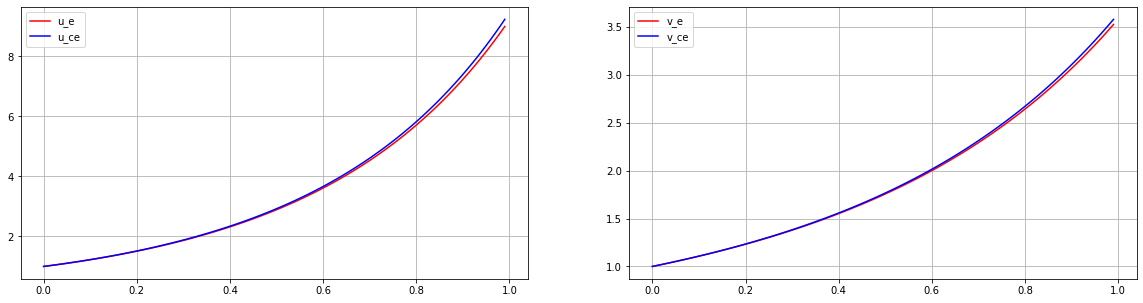

In [97]:
fig, axs = plt.subplots(1, 2, figsize = (20, 5))
axs[0].plot(arr_t_e, res_e[0], color = 'red', label = 'u_e')
axs[0].plot(arr_t_ce, res_ce[0], color = 'blue', label = 'u_ce')
axs[1].plot(arr_t_e, res_e[1], color = 'red', label = 'v_e')
axs[1].plot(arr_t_ce, res_ce[1], color = 'blue', label = 'v_ce')
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

**4.** Сравнить полученные результаты.

Как мы видим, графики компонент оказались довольно схожи. Тем не менее, графики не совпадают. Правило Рунге показывает, что метод Эйлера-Коши более точен, что и следовало ожидать.

**Задача 7.2.  Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами:**

Y' = AY, Y(0) = Y_0

Z' = BZ, Z(0) = Z_0

где A и B – заданные матрицы, Y_0 и Z_0 -  заданные векторы.

Исследовать поведение решения систем уравнений.

**ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:**

**1.** Используя встроенную функцию пакета NUMPY для нахождения собственных чисел матриц A и B, найти коэффициенты жесткости обеих систем. Установить, какая задача является жесткой.

In [12]:
A = np.array([[-206.713, 18.011, -23.171], [-11.491, -206.768, -26.811], [-27.004, -22.946, -18.519]])
B = np.array([[-113.624, 87.954, -145.069], [-103.339, -104.343, 244.629], [134.543, -250.572, -210.385]])
Y2_0 = np.array([3.2, 3.6, 4.0])
Z2_0 = np.array([7.2, 7.6, 8.4])
print('A:', A)
print('B:', B)
print('Y_0:', Y2_0)
print('Z_0:', Z2_0)

A: [[-206.713   18.011  -23.171]
 [ -11.491 -206.768  -26.811]
 [ -27.004  -22.946  -18.519]]
B: [[-113.624   87.954 -145.069]
 [-103.339 -104.343  244.629]
 [ 134.543 -250.572 -210.385]]
Y_0: [3.2 3.6 4. ]
Z_0: [7.2 7.6 8.4]


In [13]:
eigvals_A = np.linalg.eigvals(A)
eigvals_B = np.linalg.eigvals(B)
print('Собственные значения A:', eigvals_A)
print('Собственные значения B:', eigvals_B)
print()

print(np.max(abs(eigvals_A.real)))
print(np.min(abs(eigvals_A.real)))
print(np.max(abs(eigvals_A.real))/np.min(abs(eigvals_A.real)))
print()

print(np.max(np.abs(eigvals_B.real)))
print(np.min(np.abs(eigvals_B.real)))
print(np.max(np.abs(eigvals_B.real))/np.min(np.abs(eigvals_B.real)))

Собственные значения A: [ -11.9996879  +0.j         -210.00015605+14.99998431j
 -210.00015605-14.99998431j]
Собственные значения B: [-131.39686893  +0.j         -148.47756553+294.19817995j
 -148.47756553-294.19817995j]

210.00015604833263
11.999687903334753
17.500468157173728

148.47756553274868
131.39686893450283
1.1299931781993986


Как мы видим, у матрицы A число жёсткости ~17.5 >> 1, следовательно имеем жёсткую систему. Матрица B имеет число жёсткости ~1.13, а значит, вторая система не считается жёсткой.

**2.** Численно решить обе задачи на отрезке [0,1] c шагом h = 0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h. Построить графики компонент полученного решения.

[ 631.921736   1092.89204864  191.91751978]


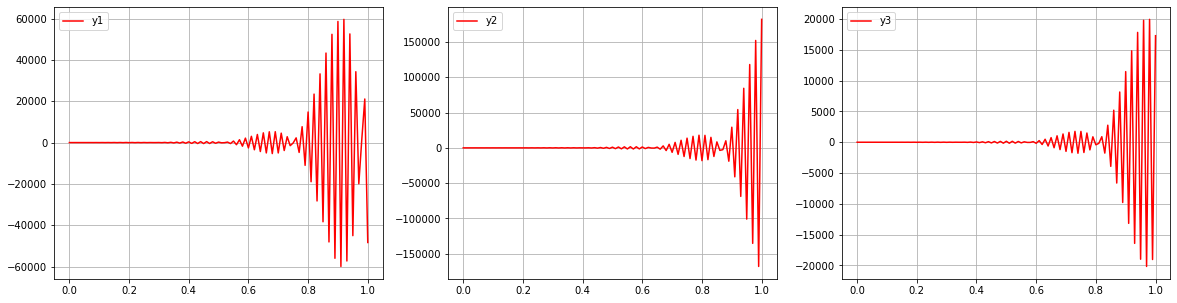

In [75]:
def dy(a, y1, y2, y3):
    return a[0]*y1 + a[1]*y2 + a[2]*y3

def euler_matrix(A, Y_0, x_0, h, number_of_points):
    res = [[Y_0[0]], [Y_0[1]], [Y_0[2]]]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        res_v = A @ np.array([res[0][i], res[1][i], res[2][i]])
        if i == 1:
            print(res_v)
        res[0].append(res[0][i] + h *res_v[0])
        res[1].append(res[1][i] + h *res_v[1])
        res[2].append(res[2][i] + h *res_v[2])
        #res[0].append(res[0][i] + h * dy(A[0], res[0][i], res[1][i], res[2][i]))
        #res[1].append(res[1][i] + h * dy(A[1], res[0][i], res[1][i], res[2][i]))
        #res[2].append(res[2][i] + h * dy(A[2], res[0][i], res[1][i], res[2][i]))
    return np.array(res), np.array(points)

a_2 = 0
b_2 = 1
h_2_base = 0.01
number_of_points_2 = int((b_2-a_2)/h_2_base)

res_eA, points_eA = euler_matrix(A, Y2_0, x1_0, h_2_base, number_of_points_2)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_eA, res_eA[0], color = 'red', label = 'y1')
axs[1].plot(points_eA, res_eA[1], color = 'red', label = 'y2')
axs[2].plot(points_eA, res_eA[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

Из графиков следует, что явный метод неустойчив для задачи 1.

[ 4562.89284212 -5220.59045126  -154.83413172]


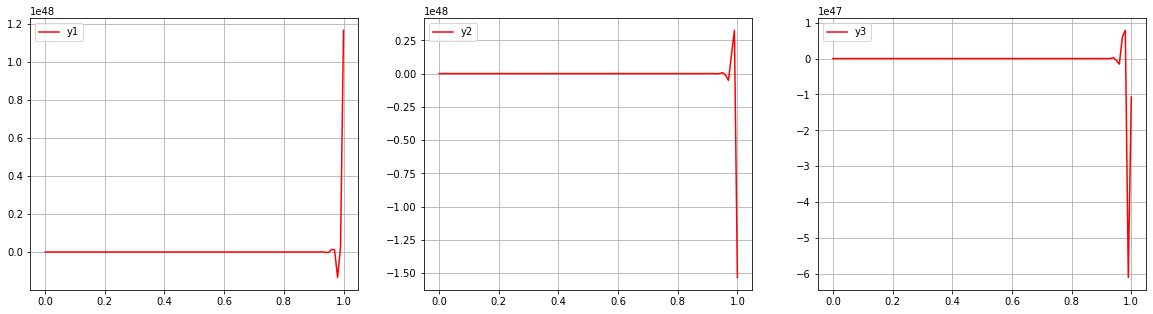

In [77]:
res_eB, points_eB = euler_matrix(B, Z2_0, x1_0, h_2_base, number_of_points_2)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_eB, res_eB[0], color = 'red', label = 'y1')
axs[1].plot(points_eB, res_eB[1], color = 'red', label = 'y2')
axs[2].plot(points_eB, res_eB[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

Несмотря на то, что вторая система не является жёсткой, явный метод Эйлера является неустойчивым для неё.

**3.** Численно решить обе задачи на отрезке [0,1] c шагом h = 0.01 по индивидуальному варианту из лабораторной работы 6. Определить, для какой из задач метод неустойчив при данном шаге h. Построить графики компонент полученного решения.

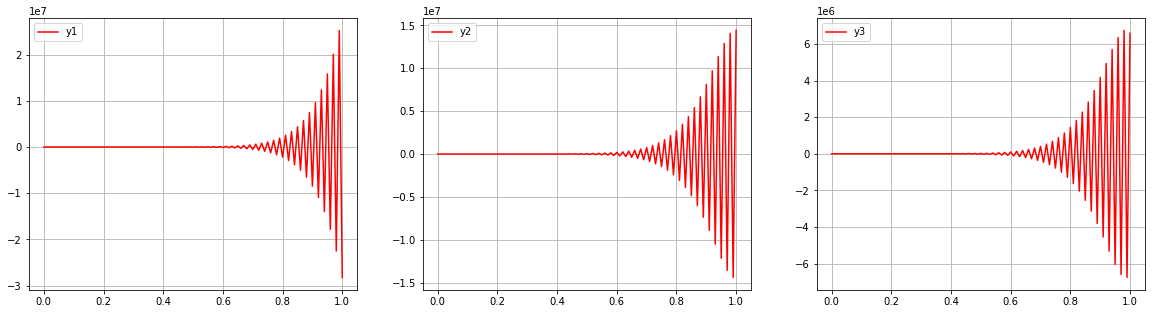

In [78]:
def cauchy_euler_matrix(A, Y_0, x_0, h, number_of_points):
    res = [[Y_0[0]], [Y_0[1]], [Y_0[2]]]
    points = [x_0]
    for i in range(number_of_points):
        points.append(points[i] + h)
        arr = np.array([res[0][i], res[1][i], res[2][i]])
        arr_new = np.array([arr[0] + h * arr[0], arr[1] + h * arr[1], arr[2] + h * arr[2]])
        #val0 = dy(A[0], res[0][i], res[1][i], res[2][i])
        res_v = A @ arr
        res_v_new = A @ arr_new
        #val1 = dy(A[1], res[0][i], res[1][i], res[2][i])
        #val2 = dy(A[2], res[0][i], res[1][i], res[2][i])
        #res[0].append(res[0][i] +
        #             h / 2 * (val0 +
        #            dy(A[0], res[0][i] + h * val0, res[1][i] + h * val1, res[2][i] + h * val2)))
        #res[1].append(res[1][i] +
        #             h / 2 * (val1 +
        #             dy(A[1], res[0][i] + h * val0, res[1][i] + h * val1, res[2][i] + h * val2)))
        #res[2].append(res[2][i] +
        #             h / 2 * (val2 +
        #             dy(A[2], res[0][i] + h * val0, res[1][i] + h * val1, res[2][i] + h * val2)))
        res[0].append(arr[0] +
                     h / 2 * (res_v[0] + res_v_new[0]))
        res[1].append(arr[1] +
                     h / 2 * (res_v[1] + res_v_new[1]))
        res[2].append(arr[2] +
                     h / 2 * (res_v[2] + res_v_new[1]))
    return np.array(res), np.array(points)

res_ceA, points_ceA = cauchy_euler_matrix(A, Y2_0, x1_0, h_2_base, number_of_points_2)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_ceA, res_ceA[0], color = 'red', label = 'y1')
axs[1].plot(points_ceA, res_ceA[1], color = 'red', label = 'y2')
axs[2].plot(points_ceA, res_ceA[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

Как мы видим, метод индивидуального варианта также оказался неустойчив к задаче 1.

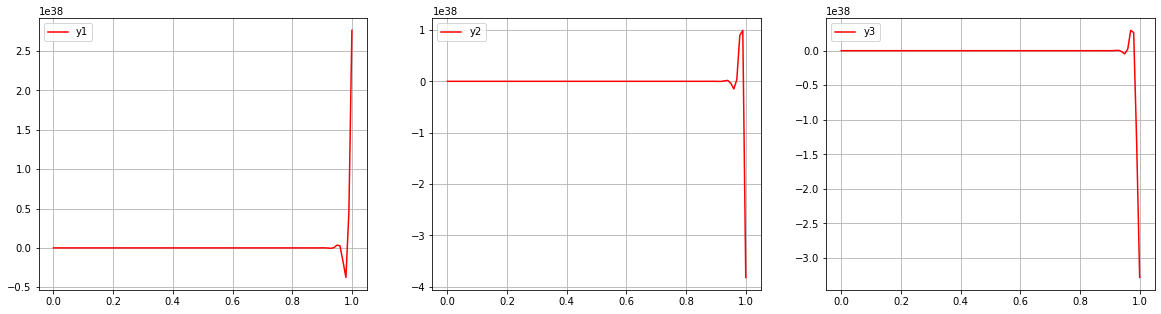

In [79]:
res_ceB, points_ceB = cauchy_euler_matrix(B, Z2_0, x1_0, h_2_base, number_of_points_2)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_ceB, res_ceB[0], color = 'red', label = 'y1')
axs[1].plot(points_ceB, res_ceB[1], color = 'red', label = 'y2')
axs[2].plot(points_ceB, res_ceB[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

Вновь получаем, что метод оказался неустойчив для нежёсткой системы.

**4.** Для жесткой задачи экспериментально подобрать шаг h, при котором графики компонент решения, полученного по явному методу Эйлера, визуально совпадают с графиками компонент решения, полученного по неявному методу с шагом h = 0.01. Сравнить найденное значение шага с теоретическим значением шага, при котором  явный метод Эйлера для жестких задач должен быть устойчивым.

In [19]:
print('h <=', 1/np.max(np.abs(eigvals_B.real)))

h <= 0.006735024220069373


h теоретический:
h <= 1/MAX |Re lambda| ~= 0.00674 => попробуем h = 0.0099, h = 0.007 и h = 0.004

0.00980392156862745
102
[ 606.01491765 1054.0435771   183.38787429]


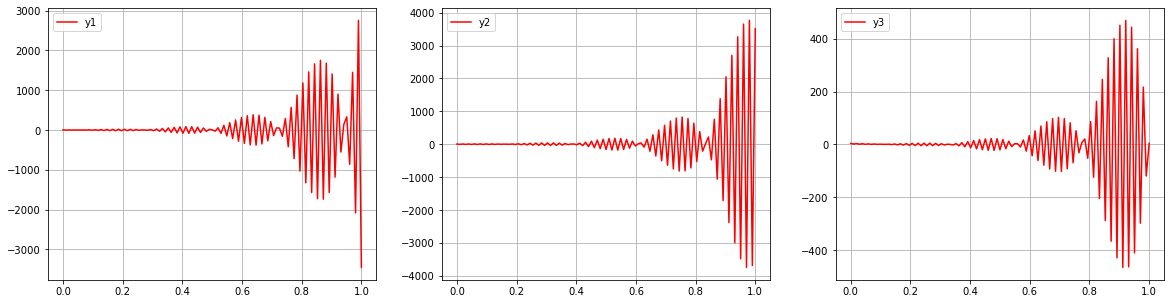

In [91]:
h_test1 = 0.0099
num_of_p_1 = int((b_2 - a_2) // h_test1) + 1
h_test1 = (b_2 - a_2) / num_of_p_1
print(h_test1)
print(num_of_p_1)

res_t1, points_t1 = euler_matrix(A, Y2_0, x1_0, h_test1, num_of_p_1)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_t1, res_t1[0], color = 'red', label = 'y1')
axs[1].plot(points_t1, res_t1[1], color = 'red', label = 'y2')
axs[2].plot(points_t1, res_t1[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

При h = 0.0099 явный метод Эйлера остаётся неустойчивым для задачи 1.

0.006993006993006993
[234.62346574 497.12492912  61.1097397 ]


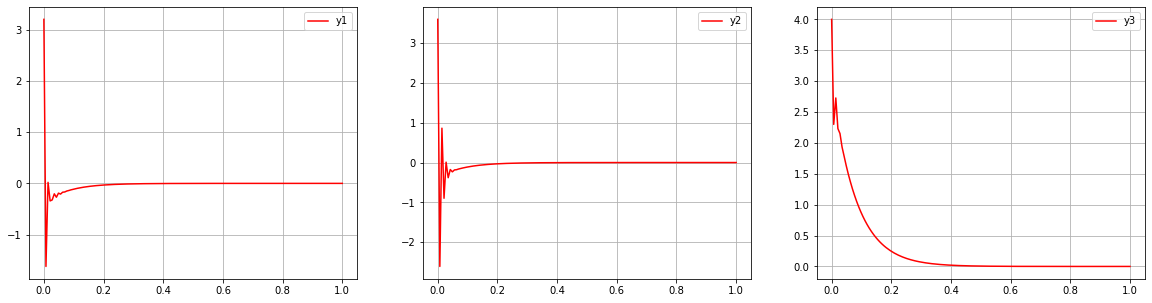

In [92]:
h_test2 = 0.007
num_of_p_2 = (b_2 - a_2) // h_test2 + 1
h_test2 = (b_2 - a_2) / num_of_p_2
print(h_test2)

res_t2, points_t2 = euler_matrix(A, Y2_0, x1_0, h_test2, int(num_of_p_2))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_t2, res_t2[0], color = 'red', label = 'y1')
axs[1].plot(points_t2, res_t2[1], color = 'red', label = 'y2')
axs[2].plot(points_t2, res_t2[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

При h = 0.007 метод оказался устойчивым, при этом шаг превышает теоретическое значение.

0.004
[-160.8269056   -95.87118054  -69.08963209]


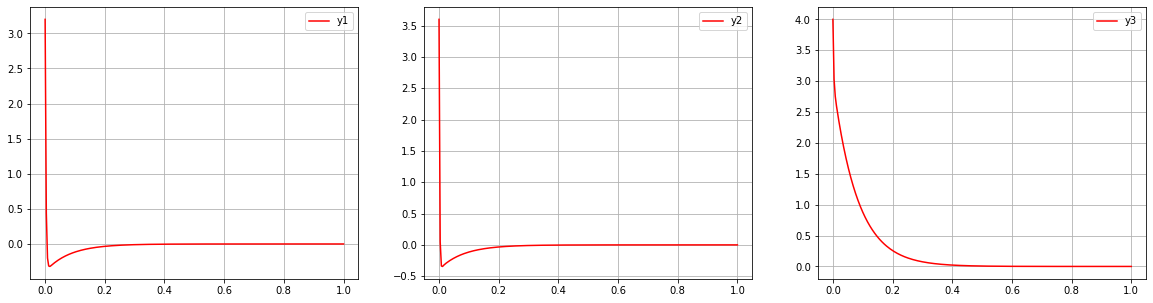

In [93]:
h_test3 = 0.004
num_of_p_3 = (b_2 - a_2) // h_test3 + 1
h_test3 = (b_2 - a_2) / num_of_p_3
print(h_test3)

res_t3, points_t3 = euler_matrix(A, Y2_0, x1_0, h_test3, int(num_of_p_3))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_t3, res_t3[0], color = 'red', label = 'y1')
axs[1].plot(points_t3, res_t3[1], color = 'red', label = 'y2')
axs[2].plot(points_t3, res_t3[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

При h = 0.004 графики несколько сгладились.

9.9999990000001e-08
[-689.31278752 -888.36018728 -243.09004988]


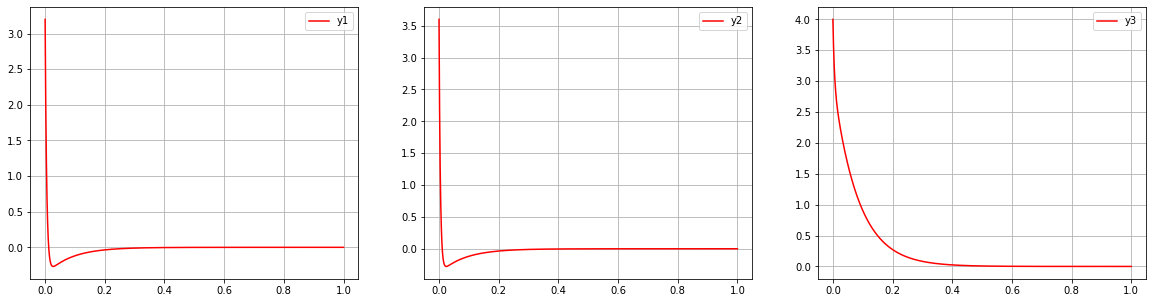

In [83]:
h_test3 = 0.0000001
num_of_p_3 = (b_2 - a_2) // h_test3 + 1
h_test3 = (b_2 - a_2) / num_of_p_3
print(h_test3)

res_t3, points_t3 = euler_matrix(A, Y2_0, x1_0, h_test3, int(num_of_p_3))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_t3, res_t3[0], color = 'red', label = 'y1')
axs[1].plot(points_t3, res_t3[1], color = 'red', label = 'y2')
axs[2].plot(points_t3, res_t3[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

При дальнейшем уменьшении шага изменения незначительны.

0.01


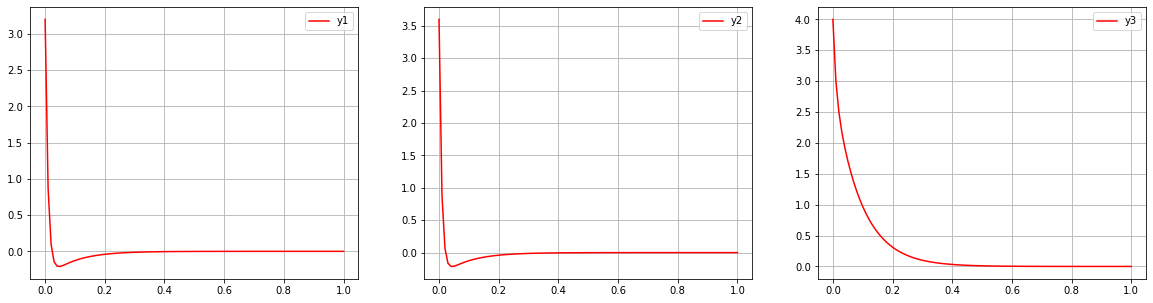

In [85]:
def ImpEuler(A, Y_0, x_0, h, number_of_points):
    res = [[Y_0[0]], [Y_0[1]], [Y_0[2]]]
    points = [x_0]
    inv = np.linalg.inv(np.eye(3) - h*A)
    for i in range(number_of_points):
        points.append(points[i] + h)
        res_v = inv @ np.array([res[0][i], res[1][i], res[2][i]])
        res[0].append(res_v[0])
        res[1].append(res_v[1])
        res[2].append(res_v[2])
    return np.array(res), np.array(points)

h_i = 0.01
num_of_p_i = (b_2 - a_2) // h_i + 1
h_i = (b_2 - a_2) / num_of_p_i
print(h_i)

res_i, points_i = ImpEuler(A, Y2_0, x1_0, h_i, int(num_of_p_i))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(points_i, res_i[0], color = 'red', label = 'y1')
axs[1].plot(points_i, res_i[1], color = 'red', label = 'y2')
axs[2].plot(points_i, res_i[2], color = 'red', label = 'y3')
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

Неявный метод Эйлера с шагом h = 0.01 дал нам графики, схожие с теми, что мы получили для явного метода Эйлера с шагом h = 0.004

**4.** Сравнить полученные результаты.
Как метод Эйлера, так и метод Эйлера-Коши оказались неустойчивы для наших систем. Теоретическая оценка позволяет определить значение шага, при котором явный метод Эйлера становится устойчивым. При этом неявный метод Эйлера устойчив для жёсткой системы при изначальном шаге h = 0.01.